# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Radithya Satya Gantara
- **Email:** radithyasatya7@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Dan pada musim apa penyewaan paling banyak dilakukan?


## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memunculkan Beberapa data dari day.csv
- Memunculkan Beberapa data dari hour.csv

### Assessing Data

In [40]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [41]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [42]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [43]:
print("Jumlah Duplikat: ", hour_df.duplicated().sum())
print("Jumlah Duplikat: ", day_df.duplicated().sum())

Jumlah Duplikat:  0
Jumlah Duplikat:  0


In [44]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [45]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Informasi Data Type Table Day dan Table Hour
- Tidak ada Yang Nilainya Null di Kedua Tabel
- Tidak ada Yang Nilainya Duplikat pada Kedua Tabel

### Cleaning Data

In [53]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] = day_df[column].astype("category")
    if column in hour_df:
        hour_df[column] = hour_df[column].astype("category")

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

rename_dict = {
    'yr': 'year', 'mnth': 'month', 'weekday': 'one_of_week',
    'weathersit': 'weather_situation', 'windspeed': 'wind_speed',
    'cnt': 'count_cr', 'hum': 'humidity', 'hr':'hours'
}
day_df.rename(columns=rename_dict, inplace=True)
hour_df.rename(columns=rename_dict, inplace=True)

season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
week_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
year_map = {0: '2011', 1: '2012'}

day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

day_df['month'] = day_df['month'].map(month_map)
hour_df['month'] = hour_df['month'].map(month_map)

day_df['weather_situation'] = day_df['weather_situation'].map(weather_map)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_map)

day_df['one_of_week'] = day_df['one_of_week'].map(week_map)
hour_df['one_of_week'] = hour_df['one_of_week'].map(week_map)

day_df['year'] = day_df['year'].map(year_map)
hour_df['year'] = hour_df['year'].map(year_map)

day_df['humidity'] *= 100
hour_df['humidity'] *= 100

**Insight:**
- Merapihkan nama kolom dan mengubah beberapa yang index supaya ada labelnya

## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [54]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000


In [55]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
- Dari sum tersebut kita dapat jumlah dari data yang menyewa terbanyak ada pada pukul 17 dan data paling sedikit pada pukul 4

### Explore Data Day

In [56]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000


In [57]:
day_df.groupby(by="season", observed=False)["count_cr"].sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Insight:**
- Dari data diatas terlihat musim paling banyak orang menyewa pada musim fall

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?

<ipython-input-62-976d11198d68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#85d49a", "#85d49a", "#32a852", "#85d49a", "#85d49a"], ax=ax[0])
<ipython-input-62-976d11198d68>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#85d49a", "#85d49a", "#85d49a", "#85d49a","#32a852"], ax=ax[1])


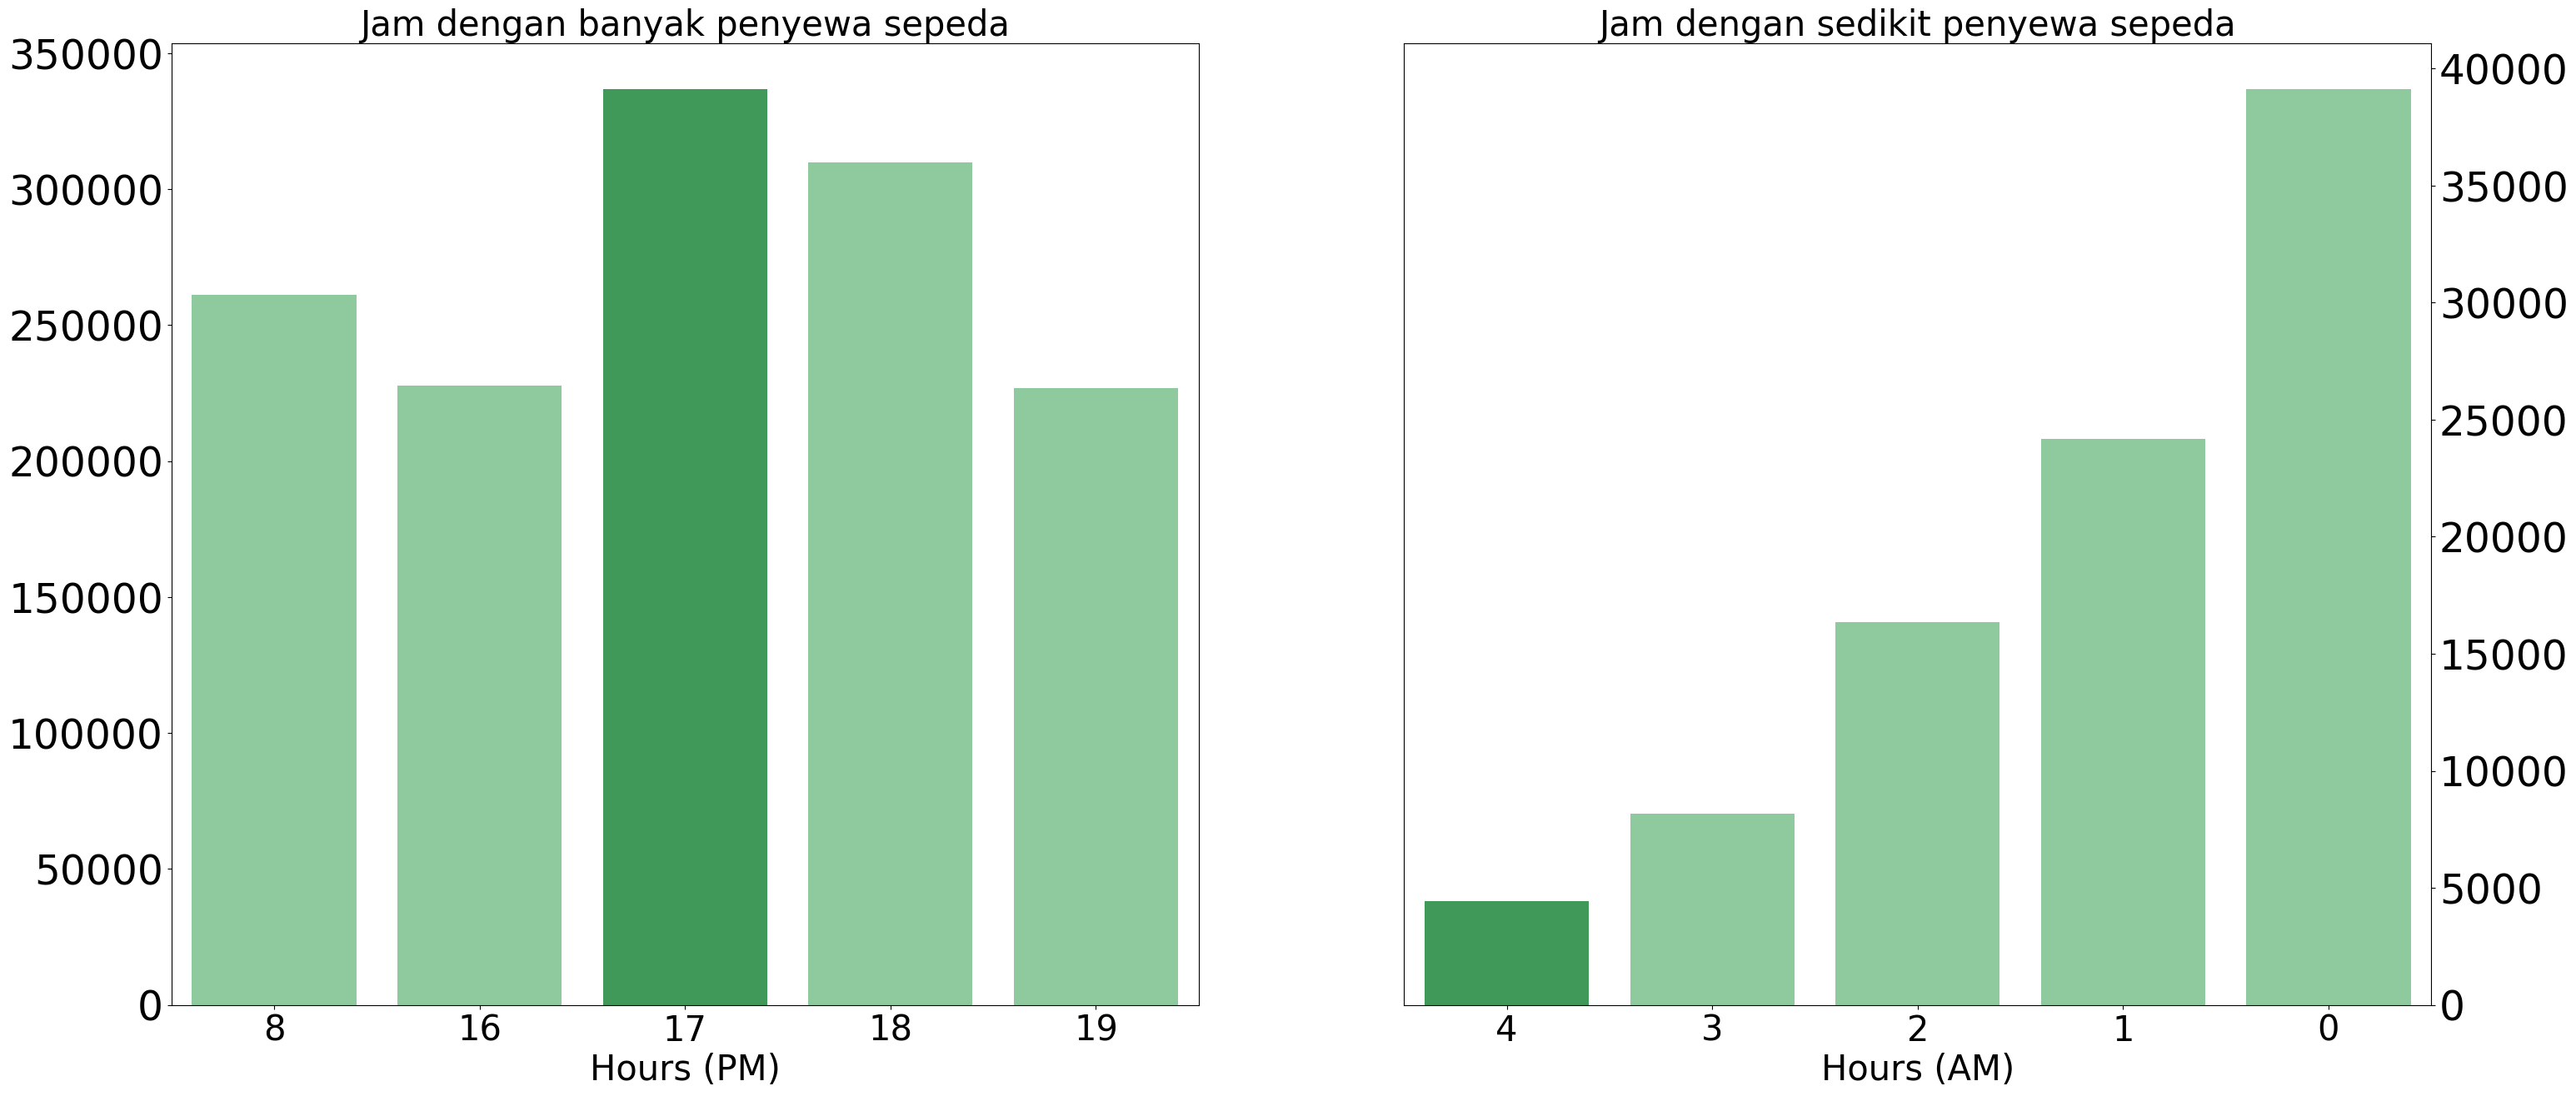

In [62]:
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#85d49a", "#85d49a", "#32a852", "#85d49a", "#85d49a"], ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#85d49a", "#85d49a", "#85d49a", "#85d49a","#32a852"], ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()

Dari data diatas kita dapat melihat bahwasannya data paling banyak berada pada jam 17 dan paling sedikit pada jam 4

### Pertanyaan 2: Dan pada musim apa penyewaan paling banyak dilakukan?

<ipython-input-65-d2408ce980ea>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = day_df.groupby("season")["count_cr"].sum().sort_values(ascending=False)


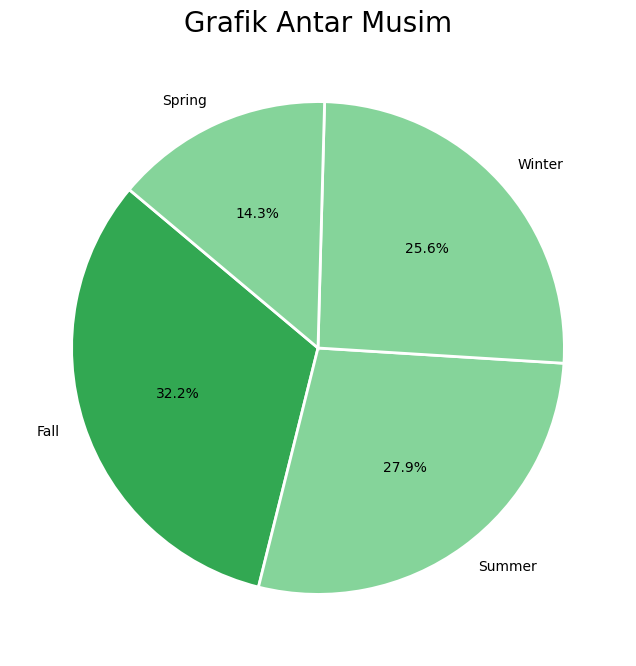

In [65]:
season_counts = day_df.groupby("season")["count_cr"].sum().sort_values(ascending=False)

colors = ["#32a852","#85d49a", "#85d49a", "#85d49a"]

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

ax.set_title("Grafik Antar Musim", fontsize=20)
plt.show()

Musim Paling banyak Orang menyewa pada musim fall dengan 32.2% dari keseluruhan data yang ada

## Conclusion

- Conclution pertanyaan 1 :  Berdasarkan gambar, Kita  dapat melihat bahwa penyewaan sepda paling banyak digunakan pada pukul 17:00. dan paling sedikit penyewaan pada terjadi pada pukul 04:00
- Conclution pertanyaan 2 : Paling banyak orang menyewa pada musim Fall